In [3]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Data\\'

# Data

In [4]:
# store files names for all datasets
filenames: dict[str,str] = {
   'I1mA t1'   : path_data + 'a-I1ma_trial1_table.csv', 
   'I1mA t2'   : path_data + 'a-I1ma_trial2_table.csv', 
} # t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

I1mA t1 columns:	 ['n&l / pm', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s', 'R_5 / 1/s']
I1mA t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s']


# Plots

In [5]:
def PlotXmanyY(
    x: np.array, # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    if(logScale) : ax.set_yscale('log')
    # data
    for yi,yl,ci in zip(y,yleg,c) : 
        # plt.plot(x,yi,c=ci,linestyle=linestyle,label=yl) 
        plt.errorbar(x, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    plt.legend()
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

## A. Constant I=1ma

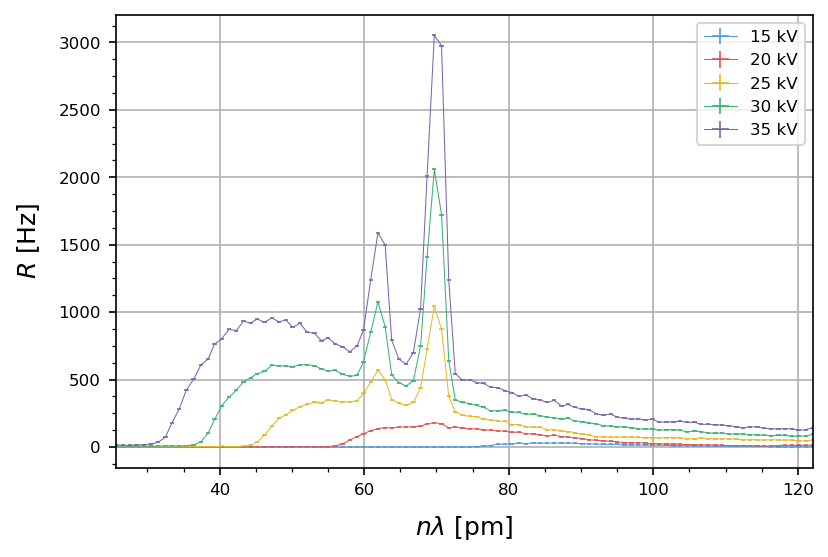

In [7]:
PlotXmanyY(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t1']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV'],
    c = my.color5,
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t1.png' 
)

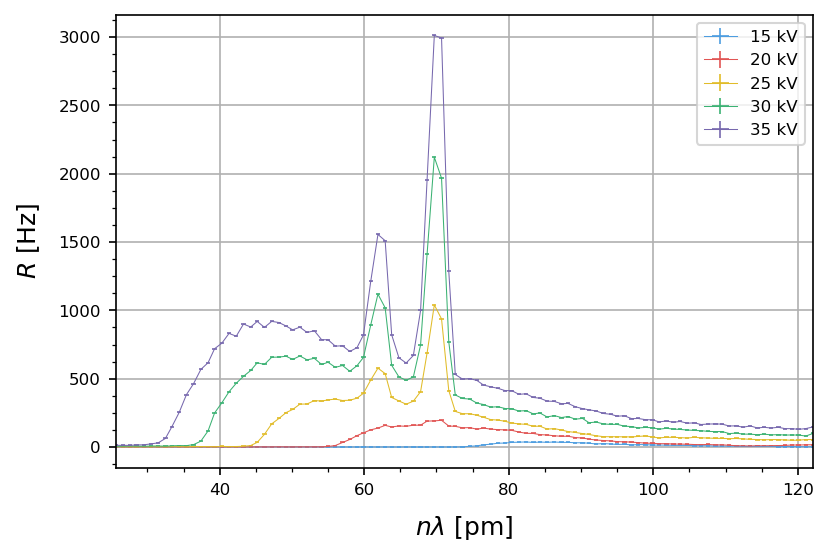

In [8]:
PlotXmanyY(
    x = tables['I1mA t2']['n&l / pm'],
    y = [tables['I1mA t2']['R_0 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV'],
    c = my.color5,
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t2']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t2.png' 
)

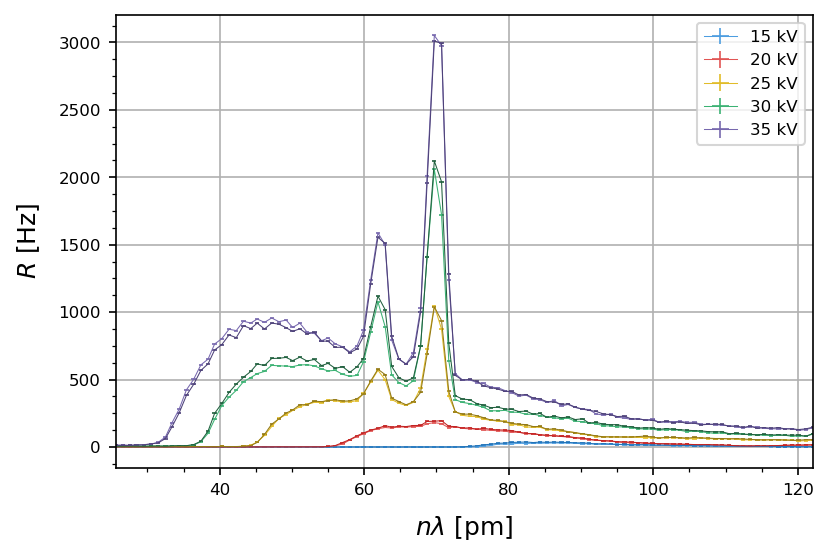

In [9]:
PlotXmanyY(
    x = tables['I1mA t2']['n&l / pm'],
    y = [ #t1
         tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t1']['R_4 / 1/s'],
         # t2
         tables['I1mA t2']['R_0 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV',None,None,None,None,None],
    c = my.color5+my.color5_dark,
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t12.png' 
)


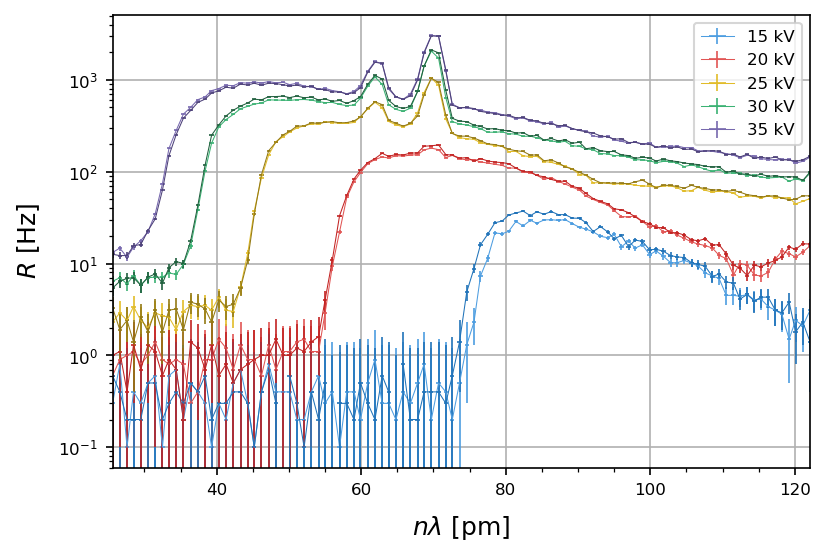

In [11]:
PlotXmanyY(
    x = tables['I1mA t2']['n&l / pm'],
    y = [ #t1
         tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t1']['R_4 / 1/s'],
         # t2
         tables['I1mA t2']['R_0 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV',None,None,None,None,None],
    c = my.color5+my.color5_dark,
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    logScale = True,
    fileName = path_fig + 'a-I1mA_t12_log.png' 
)

Notes from the Prof. 10/10/23
* try to fit a continuous curve to the brehmstralung radiation, ignoring peaks
   * try to charactarize the first initial increace in brehmstralung (steep vertical slope)
   * try to calculate the log-linear slope decreace towards increacing wavelength
* Calculate background to peak difference between brehmastralung and emission line. Increace in voltage increaces the probability of emission line photon
* determine the wavelength of the emission lines

https://en.wikipedia.org/wiki/Bremsstrahlung 

https://en.wikipedia.org/wiki/Kramers%27_law 
* Kramers' law is a formula for the spectral distribution of X-rays produced by an electron hitting a solid target. The formula concerns only bremsstrahlung radiation, not the element specific characteristic radiation.
* $I\left(\lambda\right)\ =\ K\left(\frac{x}{\lambda_{min}}-1\right)\left(\frac{1}{\lambda^{2}}\right)$ where $\lambda$ is wavelength and $I$ is photon count/intensity. The constant K is proportional to the atomic number of the target element.
* K --> Element Molybdenum (Mo), Group 6, Atomic Number 42

https://en.wikipedia.org/wiki/Duane%E2%80%93Hunt_law
* $\lambda_{min}$ is decribed by Duane–Hunt law
* $\lambda = \frac{hc}{eV} \approx \frac{1239.8 pm}{V}$ where $V$ is voltage in kV.



## B. Const U=35 kV